# CUSTOMER SEGMENTATION USING KMEANS CLUSTERING

## Project Objective

The objective of this project is to segment customers from online retail transaction data based on their purchasing behavior using unsupervised machine learning techniques.

By analyzing historical transaction patterns and applying **K-Means clustering**, the project aims to:
- Identify distinct customer groups with similar buying behavior
- Understand variations in customer engagement and spending patterns
- Support targeted marketing, retention, and customer relationship strategies
- Enable data-driven decision-making for business growth

This segmentation provides actionable insights that help businesses personalize offerings, improve customer retention, and optimize marketing efforts.


Step of project:
- 1.import Libraries (with explanations)
- 2.Data Loading & Exploration
- 3.Data Cleaning 
- 4.Feature Engineering 
- 5.Data Preparation
- 6.Feature Scaling (StandardScaler)
- 7.Optimal k Selection (Elbow Method)
- 8.Apply KMeans
- 9.Cluster Analysis
- 10.Visualization
- 11.Model Validation (Silhouette Score)

## 1.import Libraries

In [1]:
## 1 import Libraries (with explanations)

import pandas as pd  ## data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # Liniear Algebra
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

## 2.Data Loading & Exploration

In [84]:
## Loding the dataset
df = pd.read_csv(r'H:\Machine Learing\k-means clustring\Online Retail.csv')

In [85]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
df.shape

(541909, 8)

In [89]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 3.DATA CLEANING & PREPROCESSING

In [91]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
## Rearrange the Dataset Column
new_order = ['CustomerID','StockCode','InvoiceNo','InvoiceDate','UnitPrice','Quantity','Description','Country']
df = df.reindex(columns = new_order)

In [5]:
df

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Description,Country
0,17850.0,85123A,536365,12/1/2010 8:26,2.55,6,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,17850.0,71053,536365,12/1/2010 8:26,3.39,6,WHITE METAL LANTERN,United Kingdom
2,17850.0,84406B,536365,12/1/2010 8:26,2.75,8,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,17850.0,84029G,536365,12/1/2010 8:26,3.39,6,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,17850.0,84029E,536365,12/1/2010 8:26,3.39,6,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...,...,...,...,...
541904,12680.0,22613,581587,12/9/2011 12:50,0.85,12,PACK OF 20 SPACEBOY NAPKINS,France
541905,12680.0,22899,581587,12/9/2011 12:50,2.10,6,CHILDREN'S APRON DOLLY GIRL,France
541906,12680.0,23254,581587,12/9/2011 12:50,4.15,4,CHILDRENS CUTLERY DOLLY GIRL,France
541907,12680.0,23255,581587,12/9/2011 12:50,4.15,4,CHILDRENS CUTLERY CIRCUS PARADE,France


In [6]:
df.duplicated(subset=['CustomerID','StockCode','InvoiceNo','InvoiceDate','UnitPrice','Quantity','Description','Country']).sum()

np.int64(5268)

In [7]:
data = df.drop(columns = 'Description', axis = 1)

#### The `Description` column contains free-text product descriptions, which are not directly useful for customer-level segmentation in this project.

In [355]:
data.shape

(541909, 7)

In [9]:
## cheking the percentage value in all feature.

round(100*(df.isnull().sum()/len(data.index)), 2)

CustomerID     24.93
StockCode       0.00
InvoiceNo       0.00
InvoiceDate     0.00
UnitPrice       0.00
Quantity        0.00
Description     0.27
Country         0.00
dtype: float64

In [10]:
data= data.dropna(subset=['CustomerID'])

In [11]:
round(100*(data.isnull().sum()/len(data.index)), 2)

CustomerID     0.0
StockCode      0.0
InvoiceNo      0.0
InvoiceDate    0.0
UnitPrice      0.0
Quantity       0.0
Country        0.0
dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406829 non-null  float64
 1   StockCode    406829 non-null  object 
 2   InvoiceNo    406829 non-null  object 
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   Quantity     406829 non-null  int64  
 6   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 24.8+ MB


#### Since we drop the null value so the dataset size is reduced form more than 500k to 400k more...

In [12]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['StockCode', 'InvoiceNo', 'InvoiceDate', 'Country']


In [362]:
data.head()

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country
0,17850.0,85123A,536365,12/1/2010 8:26,2.55,6,United Kingdom
1,17850.0,71053,536365,12/1/2010 8:26,3.39,6,United Kingdom
2,17850.0,84406B,536365,12/1/2010 8:26,2.75,8,United Kingdom
3,17850.0,84029G,536365,12/1/2010 8:26,3.39,6,United Kingdom
4,17850.0,84029E,536365,12/1/2010 8:26,3.39,6,United Kingdom


## 4.Feature Engineering 

In [363]:
data['TotalPrice'] = data['UnitPrice']*data['Quantity']

In [364]:
data.head()

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country,TotalPrice
0,17850.0,85123A,536365,12/1/2010 8:26,2.55,6,United Kingdom,15.30
1,17850.0,71053,536365,12/1/2010 8:26,3.39,6,United Kingdom,20.34
2,17850.0,84406B,536365,12/1/2010 8:26,2.75,8,United Kingdom,22.00
3,17850.0,84029G,536365,12/1/2010 8:26,3.39,6,United Kingdom,20.34
4,17850.0,84029E,536365,12/1/2010 8:26,3.39,6,United Kingdom,20.34


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406829 non-null  float64
 1   StockCode    406829 non-null  object 
 2   InvoiceNo    406829 non-null  object 
 3   InvoiceDate  406829 non-null  object 
 4   UnitPrice    406829 non-null  float64
 5   Quantity     406829 non-null  int64  
 6   Country      406829 non-null  object 
 7   TotalPrice   406829 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 27.9+ MB


In [30]:
data = data.dropna()
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [31]:
data.head(3)

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country,Year,Month,Week,DayOfWeek,Hour,Quarter
0,17850.0,85123A,536365,2010-12-01 08:26:00,2.55,6,United Kingdom,2010,12,48,2,8,4
1,17850.0,71053,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4
2,17850.0,84406B,536365,2010-12-01 08:26:00,2.75,8,United Kingdom,2010,12,48,2,8,4


In [33]:
data.describe()

,CustomerID,InvoiceDate,UnitPrice,Quantity,Year,Month,Week,DayOfWeek,Hour,Quarter
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.0,397884.000000,397884.000000,397884.000000
mean,15294.423453,2011-07-10 23:41:23.511023360,3.116488,12.988238,2010.934260,7.612475,30.964361,2.614546,12.728202,2.856081
min,12346.000000,2010-12-01 08:26:00,0.001000,1.000000,2010.000000,1.000000,1.0,0.000000,6.000000,1.000000
25%,13969.000000,2011-04-07 11:12:00,1.250000,2.000000,2011.000000,5.000000,19.0,1.000000,11.000000,2.000000
50%,15159.000000,2011-07-31 14:39:00,1.950000,6.000000,2011.000000,8.000000,34.0,2.000000,13.000000,3.000000
75%,16795.000000,2011-10-20 14:33:00,3.750000,12.000000,2011.000000,11.000000,44.0,4.000000,14.000000,4.000000
max,18287.000000,2011-12-09 12:50:00,8142.750000,80995.000000,2011.000000,12.000000,51.0,6.000000,20.000000,4.000000
std,1713.141560,NaN,22.097877,179.331775,0.247828,3.416520,14.755843,1.928310,2.273519,1.121874


In [94]:
# Convert InvoiceDate from string to date time.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

print("Date conversion successful")
print(data['InvoiceDate'].head())

Date conversion successful
0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [95]:
print(data['InvoiceDate'].max())

2011-12-09 12:50:00


In [96]:
print(data['InvoiceDate'].min())

2010-12-01 08:26:00


In [38]:
## Extract date components from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Week'] = data['InvoiceDate'].dt.isocalendar().week
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour
data['Quarter'] = data['InvoiceDate'].dt.quarter

print("\nDate columns extracted successfully!")
print(data[['InvoiceDate', 'Month', 'Week', 'DayOfWeek']].head()) 


Date columns extracted successfully!
          InvoiceDate  Month  Week  DayOfWeek
0 2010-12-01 08:26:00     12    48          2
1 2010-12-01 08:26:00     12    48          2
2 2010-12-01 08:26:00     12    48          2
3 2010-12-01 08:26:00     12    48          2
4 2010-12-01 08:26:00     12    48          2


In [39]:
data.head(2)

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country,Year,Month,Week,DayOfWeek,Hour,Quarter
0,17850.0,85123A,536365,2010-12-01 08:26:00,2.55,6,United Kingdom,2010,12,48,2,8,4
1,17850.0,71053,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   397884 non-null  float64       
 1   StockCode    397884 non-null  object        
 2   InvoiceNo    397884 non-null  object        
 3   InvoiceDate  397884 non-null  datetime64[ns]
 4   UnitPrice    397884 non-null  float64       
 5   Quantity     397884 non-null  int64         
 6   Country      397884 non-null  object        
 7   Year         397884 non-null  int32         
 8   Month        397884 non-null  int32         
 9   Week         397884 non-null  UInt32        
 10  DayOfWeek    397884 non-null  int32         
 11  Hour         397884 non-null  int32         
 12  Quarter      397884 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(5), int64(1), object(3)
memory usage: 33.8+ MB


In [41]:
data.describe()

,CustomerID,InvoiceDate,UnitPrice,Quantity,Year,Month,Week,DayOfWeek,Hour,Quarter
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.0,397884.000000,397884.000000,397884.000000
mean,15294.423453,2011-07-10 23:41:23.511023360,3.116488,12.988238,2010.934260,7.612475,30.964361,2.614546,12.728202,2.856081
min,12346.000000,2010-12-01 08:26:00,0.001000,1.000000,2010.000000,1.000000,1.0,0.000000,6.000000,1.000000
25%,13969.000000,2011-04-07 11:12:00,1.250000,2.000000,2011.000000,5.000000,19.0,1.000000,11.000000,2.000000
50%,15159.000000,2011-07-31 14:39:00,1.950000,6.000000,2011.000000,8.000000,34.0,2.000000,13.000000,3.000000
75%,16795.000000,2011-10-20 14:33:00,3.750000,12.000000,2011.000000,11.000000,44.0,4.000000,14.000000,4.000000
max,18287.000000,2011-12-09 12:50:00,8142.750000,80995.000000,2011.000000,12.000000,51.0,6.000000,20.000000,4.000000
std,1713.141560,NaN,22.097877,179.331775,0.247828,3.416520,14.755843,1.928310,2.273519,1.121874


In [42]:
data['InvoiceNo'].nunique()

18532

In [44]:
data['TotalPrice'] = data['UnitPrice']*data['Quantity']

In [45]:
data.head()

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country,Year,Month,Week,DayOfWeek,Hour,Quarter,TotalPrice
0,17850.0,85123A,536365,2010-12-01 08:26:00,2.55,6,United Kingdom,2010,12,48,2,8,4,15.30
1,17850.0,71053,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4,20.34
2,17850.0,84406B,536365,2010-12-01 08:26:00,2.75,8,United Kingdom,2010,12,48,2,8,4,22.00
3,17850.0,84029G,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4,20.34
4,17850.0,84029E,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4,20.34


In [47]:
data.columns

Index(['CustomerID', 'StockCode', 'InvoiceNo', 'InvoiceDate', 'UnitPrice',
       'Quantity', 'Country', 'Year', 'Month', 'Week', 'DayOfWeek', 'Hour',
       'Quarter', 'TotalPrice'],
      dtype='object')

In [49]:
data.shape

(397884, 14)

In [50]:
data.head(2)

,CustomerID,StockCode,InvoiceNo,InvoiceDate,UnitPrice,Quantity,Country,Year,Month,Week,DayOfWeek,Hour,Quarter,TotalPrice
0,17850.0,85123A,536365,2010-12-01 08:26:00,2.55,6,United Kingdom,2010,12,48,2,8,4,15.30
1,17850.0,71053,536365,2010-12-01 08:26:00,3.39,6,United Kingdom,2010,12,48,2,8,4,20.34


In [52]:
data.describe()

,CustomerID,InvoiceDate,UnitPrice,Quantity,Year,Month,Week,DayOfWeek,Hour,Quarter,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.0,397884.000000,397884.000000,397884.000000,397884.000000
mean,15294.423453,2011-07-10 23:41:23.511023360,3.116488,12.988238,2010.934260,7.612475,30.964361,2.614546,12.728202,2.856081,22.397000
min,12346.000000,2010-12-01 08:26:00,0.001000,1.000000,2010.000000,1.000000,1.0,0.000000,6.000000,1.000000,0.001000
25%,13969.000000,2011-04-07 11:12:00,1.250000,2.000000,2011.000000,5.000000,19.0,1.000000,11.000000,2.000000,4.680000
50%,15159.000000,2011-07-31 14:39:00,1.950000,6.000000,2011.000000,8.000000,34.0,2.000000,13.000000,3.000000,11.800000
75%,16795.000000,2011-10-20 14:33:00,3.750000,12.000000,2011.000000,11.000000,44.0,4.000000,14.000000,4.000000,19.800000
max,18287.000000,2011-12-09 12:50:00,8142.750000,80995.000000,2011.000000,12.000000,51.0,6.000000,20.000000,4.000000,168469.600000
std,1713.141560,NaN,22.097877,179.331775,0.247828,3.416520,14.755843,1.928310,2.273519,1.121874,309.071041


In [53]:
# See summary statistics
print(data[['Quantity', 'TotalPrice']].describe())

negative_qty = data[data['Quantity'] < 0]
negative_price = data[data['TotalPrice'] < 0]

print(f"Rows with negative Quantity: {len(negative_qty)}")
print(f"Rows with negative TotalPrice: {len(negative_price)}")

            Quantity     TotalPrice
count  397884.000000  397884.000000
mean       12.988238      22.397000
std       179.331775     309.071041
min         1.000000       0.001000
25%         2.000000       4.680000
50%         6.000000      11.800000
75%        12.000000      19.800000
max     80995.000000  168469.600000
Rows with negative Quantity: 0
Rows with negative TotalPrice: 0


In [55]:
data.shape

(397884, 14)

## 5.Data Preparation

In [59]:
print(f"\n1. Data shape: {data.shape}")
print(f"Rows: {data.shape[0]:,}")
print(f"Columns: {data.shape[1]}")


1. Data shape: (397884, 14)
Rows: 397,884
Columns: 14


In [60]:
print(f"\n2. Negative values check:")
print(f"Negative Quantity: {(data['Quantity'] < 0).sum()}")
print(f"Negative TotalPrice: {(data['TotalPrice'] < 0).sum()}")
print(f"Negative UnitPrice: {(data['UnitPrice'] < 0).sum()}")



2. Negative values check:
Negative Quantity: 0
Negative TotalPrice: 0
Negative UnitPrice: 0


In [61]:
print(f"\n3. Essential columns present:")
required_cols = ['CustomerID', 'InvoiceDate', 'InvoiceNo', 'TotalPrice']
for col in required_cols:
    print(f"{col}: {col in data.columns}")


3. Essential columns present:
CustomerID: True
InvoiceDate: True
InvoiceNo: True
TotalPrice: True


In [62]:
print(f"\n4. Missing values in key columns:")
print(f"CustomerID missing: {data['CustomerID'].isna().sum()}")
print(f"InvoiceDate missing: {data['InvoiceDate'].isna().sum()}")
print(f"TotalPrice missing: {data['TotalPrice'].isna().sum()}")



4. Missing values in key columns:
CustomerID missing: 0
InvoiceDate missing: 0
TotalPrice missing: 0


In [63]:
print(f"\n5. Customer count:")
unique_customers = data['CustomerID'].nunique()
print(f"Unique customers: {unique_customers:,}")


5. Customer count:
Unique customers: 4,338


In [64]:
print(f"\n6. Date range:")
print(f"From: {data['InvoiceDate'].min()}")
print(f"To: {data['InvoiceDate'].max()}")


6. Date range:
From: 2010-12-01 08:26:00
To: 2011-12-09 12:50:00


In [66]:

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create TotalAmount column
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Reference date (last transaction date + 1 day)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  
    'InvoiceNo': 'nunique',                                     
    'TotalAmount': 'sum'                                        
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [67]:
## Create feature matrix (X) with only RFM columns
X = rfm[['Recency', 'Frequency', 'Monetary']]
X.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,7,4310.00
2,75,4,1797.24
3,19,1,1757.55
4,310,1,334.40


##  6.Feature Scaling (StandardScaler)

In [98]:
## FEATURE SCALING - STANDARDIZATION
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=['Recency', 'Frequency', 'Monetary'])
X_scaled.head()


,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


## 7.Optimal k Selection (Elbow Method)

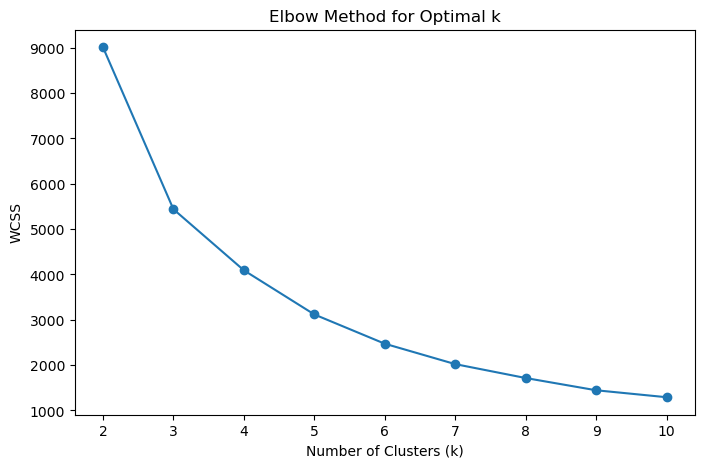

In [71]:
## OPTIMAL K SELECTION - ELBOW METHOD

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

## 8.Apply KMeans

In [72]:
## Test each k value
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1


## 9.Cluster Analysis

In [73]:
### CLUSTER ANALYSIS & INTERPRETATION
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'})

cluster_summary


,Recency,Frequency,Monetary,CustomerCount
Cluster,,,,
0,43.702685,3.682711,1359.049284,3054
1,248.075914,1.552015,480.617480,1067
2,7.384615,82.538462,127338.313846,13
3,15.500000,22.333333,12709.090490,204


## 10.Visualization

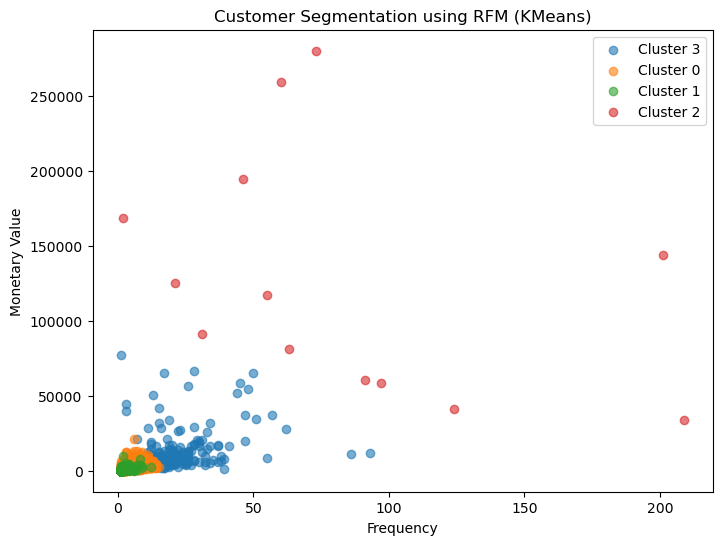

In [74]:
## VISUALIZATION of cluster
plt.figure(figsize=(8,6))

for cluster in rfm['Cluster'].unique():
    cluster_data = rfm[rfm['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Frequency'],
        cluster_data['Monetary'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Customer Segmentation using RFM (KMeans)')
plt.legend()
plt.show()


## 11.Model Validation (Silhouette Score)

In [75]:
## Reading and check the silhouette_score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.616


In [76]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt


silhouette_vals = silhouette_samples(X_scaled, kmeans.labels_)

for i in range(4):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    print(f"Cluster {i}: {cluster_silhouette_vals.mean():.3f}")

Cluster 0: 0.657
Cluster 1: 0.582
Cluster 2: 0.055
Cluster 3: 0.226


In [79]:
### Study of K=5 from the silhouette_score.
optimal_k = 5
kmeans_new = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_new.fit(X_scaled)


from sklearn.metrics import silhouette_score, silhouette_samples

overall = silhouette_score(X_scaled, kmeans_new.labels_)
silhouette_vals = silhouette_samples(X_scaled, kmeans_new.labels_)

print(f"k=5 Overall: {overall:.3f}")
for i in range(5):
    print(f"Cluster {i}: {silhouette_vals[kmeans_new.labels_ == i].mean():.3f}")

k=5 Overall: 0.617
Cluster 0: 0.656
Cluster 1: 0.584
Cluster 2: 0.233
Cluster 3: 0.197
Cluster 4: 0.392
